- **Nama : Yohanna Inawati Santoso**
- **Dataset : Northwind**
- **Fokus Analisis : orders**

In [1]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# DATA UNDERSTANDING

## **General Questions**
1. Bagaimana konteks bisnis berdasarkan dengan data yang telah diberikan?
2. Ada berapa banyak tabel yang disediakan oleh database yang tersedia?

## **Context**

Perusahaan Northwind bergerak di bidang jual-beli produk makanan. Perusahaan tersebut ingin mengetahui gambaran umum tentang bisnis yang sedang mereka jalankan.
Terdapat database yang berfokus pada proses transaksi. Dari database tersebut, perusahaan ingin mendapatkan insight yang sesuai untuk penerapan strategi yang tepat sasaran untuk memperoleh keuntungan yang lebih baik.

## **Database Information**

Sumber Database: https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

Terdapat 13 tabel pada database Northwind, yaitu:
 - Employees : Menyimpan informasi karyawan.
 - EmployeeTerritories : Menyimpan informasi teritori karyawan.
 - Territories : Menyimpan informasi data teritori.
 - Region : Menyimpan informasi wilayah.
 - Orders : Menyimpan informasi jual-beli yang terjadi.
 - OrderDetails : Menyimpan detail informasi dari setiap pesanan yang terjadi.
 - Products : Menyimpan informasi jenis produk.
 - Categories : Menyimpan informasi kategori produk.
 - Suppliers : Menyimpan informasi data supplier.
 - Shippers : Menyimpan informasi data ekspedisi.
 - Customers : Menyimpan informasi data pelanggan.
 - CustomerCustomerDemo : Menyimpan informasi demo pelanggan.
 - CustomerDemographics : Menyimpan informasi demografi pelanggan.

**Fokus utama dari analisis ini terdapat pada tabel Orders, OrderDetails, dan Shippers. Tabel lain akan digunakan sebagai penunjang informasi yang diperlukan untuk kedua tabel tersebut.**

## **Database ERD**


In [2]:
Image(url= "./Northwind ERD.png", width=600, height=600)

# DATABASE

## **SQL Questions**
1. Bagaimanakah cara menarik data dari database?
2. Apakah tabel orders, orderDetails, shippers dapat digabungkan menjadi 1 tabel?
3. Apa saja informasi penting yang dapat diambil dari ketiga tabel tersebut?

## **Connecting To Database**

Sebagai langkah awal proses analisis data, akan dibuat koneksi ke database Northwind agar tabel pada database dapat diakses.
Kemudian, Query akan digunakan untuk menarik data dari tabel Orders, OrderDetails, Shippers, Products, dan Categories. Keempat tabel ini berhubungan, sehingga data dari tabel tersebut dapat digunakan untuk proses analisis data.
Hasil query kemudian akan disimpan dalam bentuk DataFrame.

In [3]:
# Connect To Database

db_connection = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'root',
    database = 'northwind'
)

In [4]:
# Query Function

cursor = db_connection.cursor()

def getTable(query) :
    cursor.execute (query)
    result = cursor.fetchall()
    tabel = pd.DataFrame(result, columns=cursor.column_names)
    return tabel

## **Data Details**

Data yang disimpan pada variabel ```df``` merupakan data dari tabel ```order```, ```orderDetails```, ```shippers```, ```products``` dan ```categories```. Data ini menjadi data utama yang akan dianalisa lebih lanjut. Dari tabel tersebut, diambil beberapa kolom dengan informasi yang dianggap penting. Informasi tersebut adalah :

 - OrderID dari tabel orders
 - CustomerID dari tabel orders
 - OrderDate dari tabel orders
 - RequiredDate dari tabel orders
 - ShippedDate dari tabel orders
 - ShipVia dari tabel orders
 - CompanyName dari tabel shippers
 - ShipName dari tabel orders
 - ShipAddress dari tabel orders
 - ShipCity dari tabel orders
 - ShipRegion dari tabel orders
 - ShipCountry dari tabel orders
 - ProductName dari tabel Products
 - CategoryName dari tabel Categories
 - UnitPrice dari tabel orderDetails
 - Quantity dari tabel orderDetails
 - Discount dari tabel orderDetails
 - totalRev merupakan perkalian UnitPrice dan Quantity dari tabel OrderDetails untuk mendapatkan totalRevenue

Informasi tersebut dijadikan DataFrame untuk proses pengolahan informasi.

In [5]:
# Query

df = getTable('''
        SELECT o.OrderID, o.CustomerID, o.OrderDate, o.RequiredDate, o.ShippedDate, o.ShipVia, s.CompanyName,
        o.ShipName, o.ShipAddress, o.ShipCity, o.ShipRegion, o.ShipCountry, p.ProductName, c.CategoryName,
        oD.UnitPrice, oD.Quantity, oD.Discount, (oD.UnitPrice * oD.Quantity) as totalRev
        FROM orders o
        LEFT JOIN orderDetails oD
        ON o.OrderID = oD.OrderID
        JOIN Products p
        ON oD.ProductID = p.ProductID
        JOIN Categories c
        ON p.CategoryID = c.CategoryID
        JOIN shippers s
        ON o.ShipVia = s.ShipperID
''')
df.head(5)

,OrderID,CustomerID,OrderDate,RequiredDate,ShippedDate,ShipVia,CompanyName,ShipName,ShipAddress,ShipCity,ShipRegion,ShipCountry,ProductName,CategoryName,UnitPrice,Quantity,Discount,totalRev
0,11064,SAVEA,1998-05-01,1998-05-29,1998-05-04,1,Speedy Express,Save-a-lot Markets,187 Suffolk Ln.,Boise,ID,USA,Pt chinois,Meat/Poultry,24.0000,4,0.0,96.0000
1,11028,KOENE,1998-04-16,1998-05-14,1998-04-22,1,Speedy Express,Kniglich Essen,Maubelstr. 90,Brandenburg,None,Germany,Pt chinois,Meat/Poultry,24.0000,35,0.0,840.0000
2,11002,SAVEA,1998-04-06,1998-05-04,1998-04-16,1,Speedy Express,Save-a-lot Markets,187 Suffolk Ln.,Boise,ID,USA,Pt chinois,Meat/Poultry,24.0000,40,0.0,960.0000
3,10902,FOLKO,1998-02-23,1998-03-23,1998-03-03,1,Speedy Express,Folk och f HB,kergatan 24,Brcke,None,Sweden,Pt chinois,Meat/Poultry,24.0000,30,0.0,720.0000
4,10559,BLONP,1997-06-05,1997-07-03,1997-06-13,1,Speedy Express,Blondel pre et fils,"24, place Klber",Strasbourg,None,France,Pt chinois,Meat/Poultry,24.0000,18,0.0,432.0000


# **DATA MANIPULATION**

## **Data Manipulation Questions**
1. Apakah terdapat anomali data berupa missing values? Jika ada, tunjukkan dan tangani anomali tersebut!
2. Apakah terdapat anomali data berupa kesalahan tipe data? Jika ada, tunjukkan dan tangani anomali tersebut!
3. Apakah terdapat anomali data berupa data duplicate? Jika ada, tunjukkan dan tangani anomali tersebut!
4. Apakah terdapat feature yang tidak terpakai?
5. Apakah terdapat data outliers? Jika ada, bagaimana penanganannya?

Sebelum melakukan proses analisis lebih lanjut pada data ```df```, perlu dilakukan pengecekan informasi serta anomali pada data. Jika terdapat anomali yang dianggap mengganggu kebersihan data, maka perlu dilakukan pengananan pada bagian tersebut.
Mari kita lanjutkan ke proses Data Cleansing untuk memperoleh dataset yang bersih yang dapat dianalisis lebih lanjut.

## **Data Anomalies**

In [6]:
# Check informasi df

display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       2155 non-null   int64         
 1   CustomerID    2155 non-null   object        
 2   OrderDate     2155 non-null   datetime64[ns]
 3   RequiredDate  2155 non-null   datetime64[ns]
 4   ShippedDate   2082 non-null   datetime64[ns]
 5   ShipVia       2155 non-null   int64         
 6   CompanyName   2155 non-null   object        
 7   ShipName      2155 non-null   object        
 8   ShipAddress   2155 non-null   object        
 9   ShipCity      2155 non-null   object        
 10  ShipRegion    856 non-null    object        
 11  ShipCountry   2155 non-null   object        
 12  ProductName   2155 non-null   object        
 13  CategoryName  2155 non-null   object        
 14  UnitPrice     2155 non-null   object        
 15  Quantity      2155 non-null   int64   

None

,OrderID,ShipVia,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.0
mean,10659.375870,1.999536,23.812993,0.0
std,241.378032,0.774177,19.022047,0.0
min,10248.000000,1.000000,1.000000,0.0
25%,10451.000000,1.000000,10.000000,0.0
50%,10657.000000,2.000000,20.000000,0.0
75%,10862.500000,3.000000,30.000000,0.0
max,11077.000000,3.000000,130.000000,0.0


Dari general info dan deskripsi diatas, terlihat bahwa terdapat 2155 baris data dengan 18 kolom (features).

Fokus pertama adalah pada data yang tersedia pada setiap feature (Non-Null Count values). Pada feature ```ShippedDate```, ```ShipRegion``` terdapat masing-masing 2082, 856 data non-null. Sehingga dapat ditarik kesimpulan bahwa terdapat missing value yang harus diatasi.

Fokus kedua adalah pada tipe data features (Dtype). Jika dilihat pada preview bagian sebelumnya, feature ```UnitPrice``` dan ```totalRev``` seharusnya memiliki tipe data numerik, namun saat ini terbaca sebagai object. Sehingga, dapat ditarik kesimpulan bahwa terdapat data dengan tipe data tidak sesuai yang harus diubah sesuai dengan tipe data yang seharusnya.

Fokus ketiga adalah pada data ```Discount```. Dari total 2155 data, semua valuenya berisi 0, sehingga data pada feature ```Discount``` tidak perlu digunakan.

In [7]:
# Check Missing Value

df.isnull().sum()

OrderID            0
CustomerID         0
OrderDate          0
RequiredDate       0
ShippedDate       73
ShipVia            0
CompanyName        0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion      1299
ShipCountry        0
ProductName        0
CategoryName       0
UnitPrice          0
Quantity           0
Discount           0
totalRev           0
dtype: int64

## **Missing Values**

Dari 2155 data, terdapat 73 data kosong pada ```ShippedDate```. Karena data yang hilang kurang lebih 3,4% maka dapat kita atasi dengan melakukan drop data.
Untuk 1299 data kosong pada ```ShipRegion```, karena data yang hilang mencapai 60% dari seluruh data, maka tidak bisa dilakukan drop data karena mengakibatkan hilangnya banyak informasi. Feature ```ShipRegion``` juga tidak perlu digunakan untuk analisis ini, sehingga untuk mengatasinya, maka feature tersebut akan dihapus.

Setelah proses drop missing value terhadap features dan row, maka dilakukan pengecekan data untuk memastikan apakah masih ada data dengan missing value atau tidak.

In [8]:
# Remove Missing Value (Drop Feature)

df.drop(['ShipRegion'], axis=1, inplace = True)

In [9]:
# Remove Missing Value (Drop Value)

df.dropna(inplace = True)

In [10]:
# Recheck Info

df.isnull().sum()

OrderID         0
CustomerID      0
OrderDate       0
RequiredDate    0
ShippedDate     0
ShipVia         0
CompanyName     0
ShipName        0
ShipAddress     0
ShipCity        0
ShipCountry     0
ProductName     0
CategoryName    0
UnitPrice       0
Quantity        0
Discount        0
totalRev        0
dtype: int64

## **Mengubah Tipe Data**

Setelah mengatasi adanya missing value pada data, berikutnya akan dilakukan proses pengubahan tipe data agar sesuai dengan fungsionalitasnya.
Features ```UnitPrice``` dan ```totalRev``` yang terbaca sebagai object, akan diubah menjadi numerik.

Kemudian, akan dilakukan pengecekan apakah features tersebut telah terubah menjadi numerik. 

In [11]:
# Mengubah Spesifik Features ke Numeric

df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])
df['totalRev'] = pd.to_numeric(df['totalRev'])

In [12]:
#Recheck info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2154
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       2082 non-null   int64         
 1   CustomerID    2082 non-null   object        
 2   OrderDate     2082 non-null   datetime64[ns]
 3   RequiredDate  2082 non-null   datetime64[ns]
 4   ShippedDate   2082 non-null   datetime64[ns]
 5   ShipVia       2082 non-null   int64         
 6   CompanyName   2082 non-null   object        
 7   ShipName      2082 non-null   object        
 8   ShipAddress   2082 non-null   object        
 9   ShipCity      2082 non-null   object        
 10  ShipCountry   2082 non-null   object        
 11  ProductName   2082 non-null   object        
 12  CategoryName  2082 non-null   object        
 13  UnitPrice     2082 non-null   float64       
 14  Quantity      2082 non-null   int64         
 15  Discount      2082 non-null   float64 

## **Drop Feature Tidak Terpakai**

Feature ```Discount``` yang semua valuenya 0 tidak perlu digunakan. Oleh sebab itu, maka akan dilakukan drop data ```Discount```.

Setelah proses tersebut, akan dilakukan pengecekan data untuk memastikan apakah feature telah terhapus.

In [13]:
# Remove Unused Value (Drop Feature)

df.drop(['Discount'], axis=1, inplace = True)

In [14]:
#Recheck info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2154
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       2082 non-null   int64         
 1   CustomerID    2082 non-null   object        
 2   OrderDate     2082 non-null   datetime64[ns]
 3   RequiredDate  2082 non-null   datetime64[ns]
 4   ShippedDate   2082 non-null   datetime64[ns]
 5   ShipVia       2082 non-null   int64         
 6   CompanyName   2082 non-null   object        
 7   ShipName      2082 non-null   object        
 8   ShipAddress   2082 non-null   object        
 9   ShipCity      2082 non-null   object        
 10  ShipCountry   2082 non-null   object        
 11  ProductName   2082 non-null   object        
 12  CategoryName  2082 non-null   object        
 13  UnitPrice     2082 non-null   float64       
 14  Quantity      2082 non-null   int64         
 15  totalRev      2082 non-null   float64 

## **Data Duplicate**

Berikutnya, perlu dilakukan pengecekan anomali untuk data yang duplikat. Redundansi data dapat mengganggu proses analisis data. Sehingga, jika terdapat data duplikat akan dihapus. Namun jika tidak ditemukan redundansi data, maka proses analisa data dapat dilanjutkan ke tahap berikutnya.

In [15]:
# Check Dupliacate

df[df.duplicated()]

,OrderID,CustomerID,OrderDate,RequiredDate,ShippedDate,ShipVia,CompanyName,ShipName,ShipAddress,ShipCity,ShipCountry,ProductName,CategoryName,UnitPrice,Quantity,totalRev


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2154
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       2082 non-null   int64         
 1   CustomerID    2082 non-null   object        
 2   OrderDate     2082 non-null   datetime64[ns]
 3   RequiredDate  2082 non-null   datetime64[ns]
 4   ShippedDate   2082 non-null   datetime64[ns]
 5   ShipVia       2082 non-null   int64         
 6   CompanyName   2082 non-null   object        
 7   ShipName      2082 non-null   object        
 8   ShipAddress   2082 non-null   object        
 9   ShipCity      2082 non-null   object        
 10  ShipCountry   2082 non-null   object        
 11  ProductName   2082 non-null   object        
 12  CategoryName  2082 non-null   object        
 13  UnitPrice     2082 non-null   float64       
 14  Quantity      2082 non-null   int64         
 15  totalRev      2082 non-null   float64 

## **Data Outlier**

In [17]:
def outlier(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    below = q1 - 1.5 * iqr
    above = q3 + 1.5 * iqr
    idx_outlier = df[(df[col] > above) | (df[col] < below)].index
    return idx_outlier

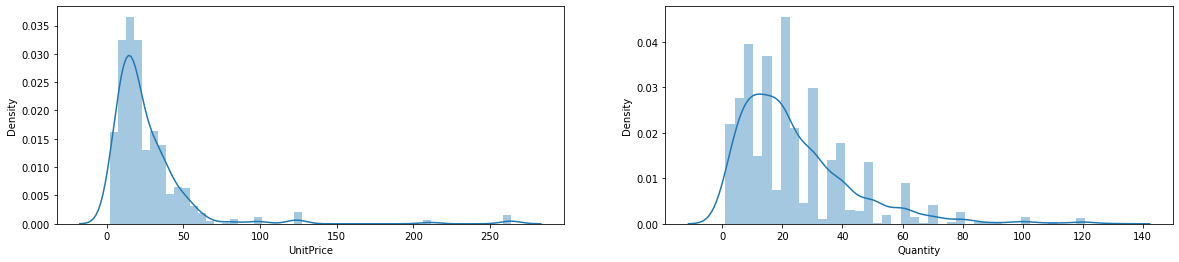

In [18]:
fig, axes= plt.subplots(1,2, figsize=(20,4))
for nf, ax in zip(['UnitPrice', 'Quantity'], axes.flatten()):
    sns.distplot(df[nf], ax=ax)

In [19]:
df_outlier= pd.DataFrame(columns=['Column', 'Number of Outliers', 'Outliers pct(%)'])

for i in ['UnitPrice', 'Quantity']:
    df_outlier= df_outlier.append({'Column': i, 'Number of Outliers': len(outlier(i)),'Outliers pct(%)': f'{round(len(outlier(i))/len(df)*100,2)} %'}, ignore_index=True)

df_outlier

,Column,Number of Outliers,Outliers pct(%)
0,UnitPrice,97,4.66 %
1,Quantity,84,4.03 %


Outliers pada feature ```UnitPrice``` dan ```Quantity``` tidak perlu dihapus. Data outliers ini kemungkinan dapat memberikan informasi mengenai harga produk yang cukup tinggi atau informasi pengiriman barang dalam jumlah banyak.

## **DATA VISUALIZATION**

## **Data Visualization Questions**
1. Apakah terdapat pelanggan setia? Dari mana lokasi pelanggan tersebut? Produk dari kategori apa yang diminati oleh mereka? Bagaimana strategi yang dapat dimanfaatkan dengan melihat adanya pelanggan setia tersebut?
2. Kategori produk apakah yang paling banyak terjual? Tampilkan dan jabarkan!
3. Produk apakah yang paling banyak terjual (best seller)? Tampilkan dan jabarkan!
4. Produk apakah yang menghasilkan revenue terbanyak? Apakah sama dengan produk best seller? Tampilkan dan jabarkan!
5. Bagaimana total order quantity yang diperoleh perusahaan perbulan?
6. Bagaimana pendapatan perusahaan perbulan? Pada bulan dan tahun berapa keuntungan terbesar perusahaan didapatkan?
7. Lokasi mana yang menghasilkan revenue terbanyak? Tampilkan dan jabarkan!
8. Produk apakah yang diminati pada masing - masing lokasi? Tampilkan dan jabarkan!
9. Apakah terdapat keterlambatan pengiriman? Bagaimana rata-rata waktu pengiriman untuk setiap shipping company?

Setelah proses data cleansing dan manipulation, data telah siap dianalisis. Data akan divisualisasikan untuk mendapatkan insight untuk pengambilan keputusan dan penyusunan strategi yang baik.
Strategi yang baik tentu akan meminimalisir kerugian perusahaan, dan dapat digunakan untuk meningkatkan profit perusahaan.

Tools pada data visualization ini akan menggunakan library Python yaitu Matplotlib dan Seaborn. Seaborn dibangun diatas Matplotlib. Namun, Seaborn memiliki kelebihan dibandingkan dengan Matplotlib yaitu hasil visualisasi yang lebih bagus serta serangkaian kodenya lebih mudah digunakan.

In [20]:
# Display clean dataframe

df.head(5)

,OrderID,CustomerID,OrderDate,RequiredDate,ShippedDate,ShipVia,CompanyName,ShipName,ShipAddress,ShipCity,ShipCountry,ProductName,CategoryName,UnitPrice,Quantity,totalRev
0,11064,SAVEA,1998-05-01,1998-05-29,1998-05-04,1,Speedy Express,Save-a-lot Markets,187 Suffolk Ln.,Boise,USA,Pt chinois,Meat/Poultry,24.0,4,96.0
1,11028,KOENE,1998-04-16,1998-05-14,1998-04-22,1,Speedy Express,Kniglich Essen,Maubelstr. 90,Brandenburg,Germany,Pt chinois,Meat/Poultry,24.0,35,840.0
2,11002,SAVEA,1998-04-06,1998-05-04,1998-04-16,1,Speedy Express,Save-a-lot Markets,187 Suffolk Ln.,Boise,USA,Pt chinois,Meat/Poultry,24.0,40,960.0
3,10902,FOLKO,1998-02-23,1998-03-23,1998-03-03,1,Speedy Express,Folk och f HB,kergatan 24,Brcke,Sweden,Pt chinois,Meat/Poultry,24.0,30,720.0
4,10559,BLONP,1997-06-05,1997-07-03,1997-06-13,1,Speedy Express,Blondel pre et fils,"24, place Klber",Strasbourg,France,Pt chinois,Meat/Poultry,24.0,18,432.0


## **Top 5 Pelanggan Setia**

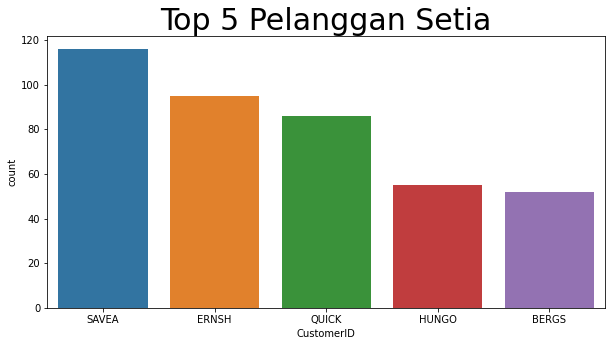

In [21]:
# Top 5 Pelanggan Setia

loyalCust = df['CustomerID'].value_counts().iloc[:5].index
plt.figure(figsize=(10,5))
plt.title ('Top 5 Pelanggan Setia', size = 30)
sns.countplot(data=df, x='CustomerID', order=loyalCust)
plt.show()

In [22]:
# Kota, Negara, Total Shipment Top 5 Pelanggan Setia

df[['CustomerID', 'ShipName', 'ShipCity', 'ShipCountry']].value_counts().nlargest(5)

CustomerID  ShipName                      ShipCity   ShipCountry
SAVEA       Save-a-lot Markets            Boise      USA            116
ERNSH       Ernst Handel                  Graz       Austria         95
QUICK       QUICK-Stop                    Cunewalde  Germany         86
HUNGO       Hungry Owl All-Night Grocers  Cork       Ireland         55
BERGS       Berglunds snabbkp             Lule       Sweden          52
dtype: int64

In [23]:
# Kategori produk yang sering dipesan oleh top 5 customers

df_category_cust = pd.pivot_table(
    df, values='OrderID', index=['CustomerID'], columns='CategoryName', aggfunc=np.ma.count, fill_value=0
)
df_category_cust.loc[(['SAVEA', 'ERNSH', 'QUICK', 'HUNGO', 'BERGS']), :]

CategoryName,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
CustomerID,,,,,,,,
SAVEA,20,5,21,19,11,13,5,22
ERNSH,16,13,11,20,11,8,7,9
QUICK,19,11,13,14,7,5,5,12
HUNGO,9,6,3,13,3,6,3,12
BERGS,13,4,8,6,1,7,3,10


Dalam rentan waktu 2 tahun, customer Save-a-lot Market dari USA telah melakukan transaksi sebanyak 116 kali. Kemudian diikuti Ernst Handel Austria, QUICK-Stop Germany, Hungry Owl All-Night Grocers Ireland, dan Berglunds snabbkp Sweden. Kelima customers ini masuk kedalam top 5 pelanggan setia. 

Dengan adanya pelanggan setia ini, maka terdapat peluang bagi perusahaan untuk menawarkan barang baru kepada mereka. Penerapan membership program, early access pemesanan produk baru, atau pemberian bonus untuk nominal pemesanan tertentu juga dapat menjadi cara promosi agar pelanggan tidak berpindah ke perusahaan lain.

Berikutnya, dari tabel diatas dapat kita lihat kategori produk apa yang paling banyak dipesan oleh kelima customer ini, sehingga dapat membantu perusahaan untuk menentukan promosi dan produk baru yang tepat untuk ditawarkan.

## **Top 5 Produk & Kategori Best Seller**

In [24]:
# Top 5 Produk Best Seller

df_ByProduct = df.groupby(
    ['ProductName']
)['totalRev', 'Quantity'].sum().reset_index()

bestSeller = df_ByProduct.sort_values(by='Quantity', ascending=False).head(5)

# bestSeller

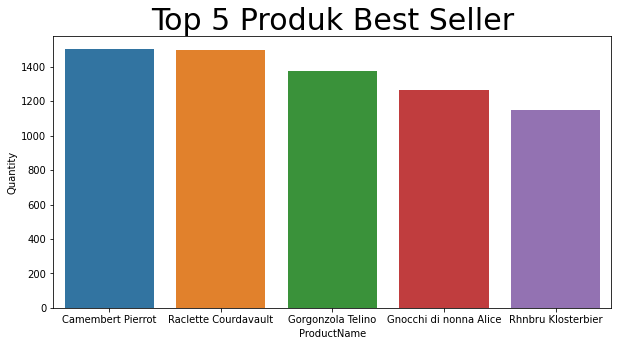

In [25]:
# Barplot list 5 produk best seller

plt.figure(figsize=(10,5))
plt.title('Top 5 Produk Best Seller', size = 30)
sns.barplot(data=bestSeller, x='ProductName', y="Quantity")
plt.show()

In [26]:
df_products = pd.pivot_table(
    df, values='Quantity', index=['ProductName', 'CategoryName'], aggfunc=np.sum, fill_value=0
)
df_products.loc[(['Camembert Pierrot', 'Raclette Courdavault', 'Gorgonzola Telino', 'Gnocchi di nonna Alice', 'Rhnbru Klosterbier']), :]

,,Quantity
ProductName,CategoryName,
Camembert Pierrot,Dairy Products,1504
Raclette Courdavault,Dairy Products,1496
Gorgonzola Telino,Dairy Products,1377
Gnocchi di nonna Alice,Grains/Cereals,1263
Rhnbru Klosterbier,Beverages,1151


In [27]:
# Top 5 BestSeller Category

df_ByCategory = df.groupby(
    ['CategoryName']
)['totalRev', 'Quantity'].sum().reset_index()

bestCategory = df_ByCategory.sort_values(by='Quantity', ascending=False).head(5)
bestCategory

,CategoryName,totalRev,Quantity
0,Beverages,280582.95,9210
3,Dairy Products,247766.50,8997
2,Confections,174295.90,7742
7,Seafood,140347.58,7551
1,Condiments,112506.75,5235


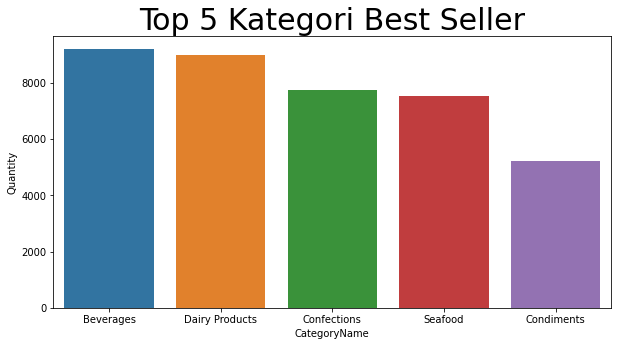

In [28]:
# Barplot list 5 kategori best seller

plt.figure(figsize=(10,5))
plt.title('Top 5 Kategori Best Seller', size = 30)
sns.barplot(data=bestCategory, x='CategoryName', y="Quantity")
plt.show()

In [29]:
# Kategori Top 5 Produk Best Revenue

df.groupby(['ProductName']).sum().sort_values('totalRev', ascending=False).head(5)

,OrderID,ShipVia,UnitPrice,Quantity,totalRev
ProductName,,,,,
Cte de Blaye,255583,52,5902.40,623,149984.2
Thringer Rostbratwurst,341272,70,3713.38,746,87736.4
Raclette Courdavault,574254,107,2761.00,1496,76296.0
Tarte au sucre,510950,98,2227.80,1083,49827.9
Camembert Pierrot,500477,96,1502.80,1504,47804.0


Produk yang paling sering dipesan adalah Camembert Pierrot sebanyak 1504 pcs. Kemudian diikuti oleh Raclette Courdavault, Gorgonzola Telino, Gnocchi di nonna Alice, dan Rhnbru Klosterbier. Dari kelima produk best seller tersebut, tiga tertinggi berasal dari kategori Dairy Products, kemudian diikuti oleh Grains/Cereals dan Beverages.

Sedangkan jika dilihat dari top 5 product category, kategori produk yang paling sering dipesan adalah Beverages dan diikuti oleh Dairy Products, Confections, Seafood, dan Condiments.

Revenue terbanyak diperoleh dari penjualan produk Cte de Blaye. Kemudian diikuti oleh produk Thringer Rostbratwurst dengan selisih revenue yang cukup jauh. Raclette Courdavault, Tarte au sucre, dan Camembert Pierrot juga termasuk kedalam 5 produk yang menghasilkan revenue terbanyak.

## **Total Orders vs Revenue per Bulan**

In [30]:
# Grouping Quantity dan Revenue per Bulan-Tahun

df['MonthlyOrderDate'] = df["OrderDate"].dt.strftime('%Y-%m')
df_monthly = df.groupby(
    ['MonthlyOrderDate']
)['totalRev', 'Quantity'].sum().reset_index()

# df_monthly

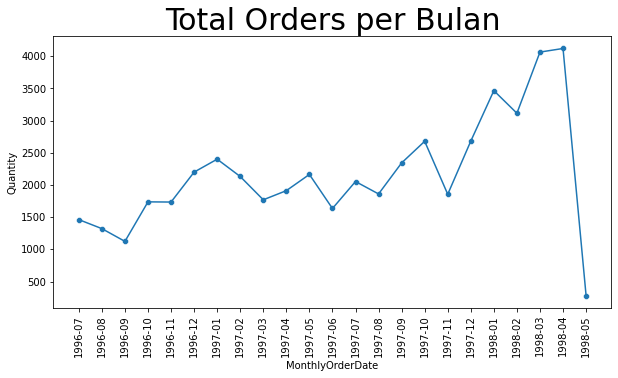

In [31]:
# Barplot Total Orders per Bulan

plt.figure(figsize=(10,5))
plt.title('Total Orders per Bulan', size = 30)
sns.lineplot(data=df_monthly, x='MonthlyOrderDate', y='Quantity')
sns.scatterplot(data=df_monthly, x='MonthlyOrderDate', y='Quantity')
plt.xticks(rotation=90);
plt.show()

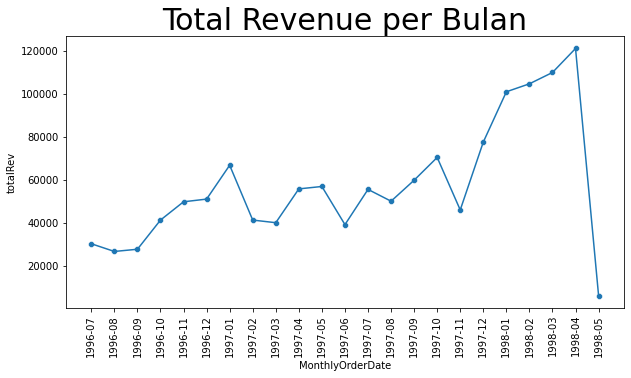

In [32]:
# Lineplot Total Revenue per Bulan

plt.figure(figsize=(10,5))
plt.title('Total Revenue per Bulan', size = 30)
sns.lineplot(data=df_monthly, x='MonthlyOrderDate', y='totalRev')
sns.scatterplot(data=df_monthly, x='MonthlyOrderDate', y='totalRev')
plt.xticks(rotation=90);
plt.show()

In [33]:
# Pengecekan OrderDate pada Mei 1998

df[df['MonthlyOrderDate'] == '1998-05'].OrderDate.max()

Timestamp('1998-05-04 00:00:00')

Data yang digunakan adalah database transaksi penjualan pada bulan Juli 1996 hingga awal Mei 1998. Mari kita lihat order dan revenue dari tahun ke tahun yang diperoleh perusahaan.

Pada Mei 1998, pemesanan yang tercatat hanya sampai tanggal 4, sehingga grafik pada Mei 1998 dapat diabaikan karena data yang ada tidak mencapai satu bulan dan tidak dapat digunakan sebagai acuan pendapatan pada bulan tersebut.

Dari grafik diatas, rata-rata puncak revenue dan orders diperoleh pada bulan Januari. Kenaikan dari bulan sebelumnya terlihat cukup signifikan. Revenue dan orders pada tahun 1996 mengalami peningkatan setiap bulannya. Namun pada tahun 1997, terlihat bahwa penjualan mengalami peningkatan dan penurunan setiap bulannya (sideways). Pada tahun 1998, revenue dan orders mulai membaik dan meningkat setiap bulannya. Dengan trend positif pada awal tahun 1998, diharapkan dapat menghasilkan revenue lebih besar dari tahun sebelumnya.

## **Revenue per Negara**

In [34]:
# Grouping Quantity dan Revenue per Negara

df_revenue_country = df.groupby(
    ['ShipCountry']
)['totalRev', 'Quantity'].sum().reset_index()

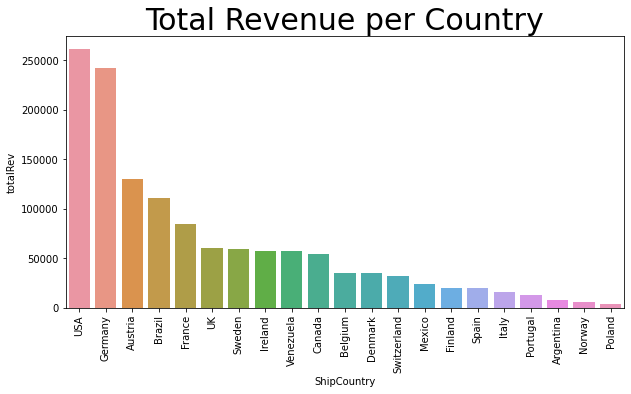

In [35]:
# Barplot Total Revenue by Country

plt.figure(figsize=(10,5))
plt.title('Total Revenue per Country', size = 30)
sns.barplot(data=df_revenue_country.sort_values(by='totalRev', ascending=False), x='ShipCountry', y='totalRev')
plt.xticks(rotation=90)
plt.show()

In [36]:
# Top 3 Country

display(df_revenue_country.sort_values(by='totalRev', ascending=False).head(3))
display(df_revenue_country.sort_values(by='Quantity', ascending=False).head(3))

,ShipCountry,totalRev,Quantity
19,USA,261482.38,9223
8,Germany,241909.13,9075
1,Austria,129375.13,4786


,ShipCountry,totalRev,Quantity
19,USA,261482.38,9223
8,Germany,241909.13,9075
1,Austria,129375.13,4786


In [37]:
# Bottom 3 Country

display(df_revenue_country.sort_values(by='totalRev', ascending=False).tail(3))
display(df_revenue_country.sort_values(by='Quantity', ascending=False).tail(3))

,ShipCountry,totalRev,Quantity
0,Argentina,7738.10,304
12,Norway,5735.15,161
13,Poland,3531.95,205


,ShipCountry,totalRev,Quantity
0,Argentina,7738.10,304
13,Poland,3531.95,205
12,Norway,5735.15,161


Selama rentan 2 tahun, negara dengan revenue tertinggi adalah USA dan Germany. Tingkat revenue dari negara ini mencapai dua kali lipat lebih banyak dibandingkan dengan negara lainnya. Negara tersebut juga merupakan negara dengan tujuan pemesanan terbanyak.

Dengan tingginya minat pemesanan pada kedua negara tersebut, agar tetap dapat berkembang, perusahaan dapat membangun tempat distribusi / warehouse / kantor cabang di USA dan Germany. Dengan beberapa saran ini diharapkan proses distribusi ke negara tersebut menjadi lebih cepat dan lebih murah.
 
Sedangkan negara Argentina, Norway, dan Poland merupakan tiga negara dengan revenue dan quantity penjualan produk terendah. Untuk menarik minat beli dari negara tersebut, perusahaan dapat membuat promosi yang sesuai dengan pelanggan di Poland dan Norway.

Untuk saran promosi yang lebih tepat, akan kita lihat kategori produk yang diminati setiap negara berikut ini.

## **Quantity Penjualan Tiap Kategori Produk per Negara**

In [38]:
df_product_per_country = pd.pivot_table(
    df, values='Quantity', index=['ShipCountry'], columns='CategoryName', aggfunc=np.sum, fill_value=0
)
# df_product_per_country

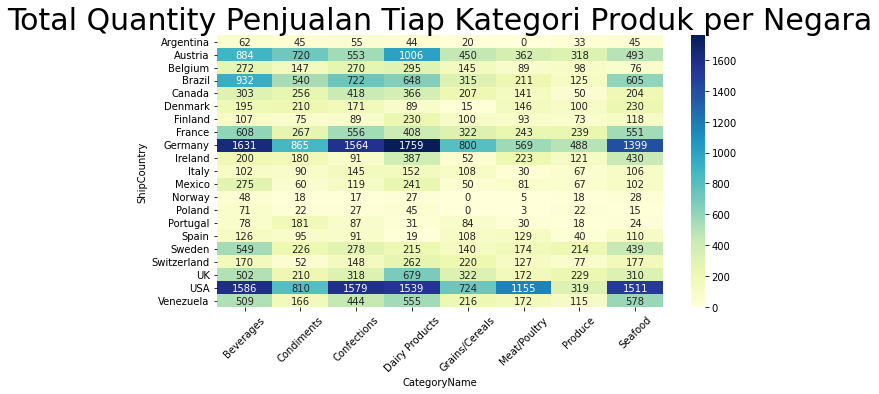

In [39]:
# Heatmap Quantity Penjualan Tiap Kategori Produk per Negara

plt.figure(figsize=(10,5))
plt.title('Total Quantity Penjualan Tiap Kategori Produk per Negara', size = 30)
sns.heatmap(df_product_per_country, annot=True, cmap="YlGnBu", fmt='g')
plt.xticks(rotation=45)
plt.show()

Dari tabel diatas, dapat kita lihat persebaran kategori produk berdasarkan quantity pemesanan di setiap negara.
Untuk negara USA, pemasaran dan pemusatan produk dapat difokuskan pada kategori Beverages, Confections, Dairy Products, Seafood, dan Meat/Poultry. Untuk Germany dapat difokuskan pada Dairy Products, Beverages, Confections, dan Seafood.

Untuk negara Poland, pemasaran produk dapat difokuskan pada Beverages dan Dairy Products. Sedangkan pada negara Norway dapat difokuskan pada Beverages.



## **Rata-Rata Waktu Pengiriman & Keterlambatan Pengiriman**

In [40]:
# DaysToShip = Selisih waktu yang diperlukan dari pemesanan hingga pengiriman
# DaysShiptoRequired = Selisih tanggal pengiriman dengan tanggal diperlukan

df['DaysToShip'] = df['ShippedDate'] - df['OrderDate']
df['DaysShiptoRequired'] = df['RequiredDate'] - df['ShippedDate']

In [41]:
df_shipped = df[['OrderID', 'OrderDate', 'RequiredDate', 'ShippedDate', 'DaysToShip', 'CompanyName', 'DaysShiptoRequired', 'ShipCountry']]

In [42]:
df_shipped.describe()

,OrderID,DaysToShip,DaysShiptoRequired
count,2082.000000,2082,2082
mean,10645.182517,8 days 08:17:17.463976945,19 days 11:11:35.100864553
std,233.122319,6 days 16:37:41.880301151,8 days 20:21:36.956543429
min,10248.000000,1 days 00:00:00,-23 days +00:00:00
25%,10444.000000,4 days 00:00:00,18 days 00:00:00
50%,10643.000000,7 days 00:00:00,21 days 00:00:00
75%,10844.750000,9 days 00:00:00,24 days 00:00:00
max,11069.000000,37 days 00:00:00,41 days 00:00:00


In [43]:
ship_delay = df_shipped[df['DaysShiptoRequired'] < '0 days']['DaysShiptoRequired']
ship_delay.describe()

count                             92
mean     -7 days +19:49:33.913043479
std        4 days 23:12:42.972929830
min               -23 days +00:00:00
25%                -7 days +00:00:00
50%                -6 days +00:00:00
75%                -2 days +00:00:00
max                -1 days +00:00:00
Name: DaysShiptoRequired, dtype: object

Rata-rata waktu pengiriman dihitung dari OrderDate adalah 8 hari. Pengiriman paling cepat adalah 1 hari dan paling lambat adalah 37 hari dari OrderDate.

Namun terdapat 92 data atau 4.4% record keterlambatan pengiriman yang dihitung berdasarkan selisih ShippedDate dengan RequiredDate. Rata-rata keterlambatan adalah 7 hari. Keterlambatan paling cepat adalah 1 hari dan paling lambat adalah 23 hari.

## **Rata-Rata Waktu Pengiriman Shipping Company**

In [44]:
# Change DaysToShip & DaysShiptoRequired timedelta to integer

df_shipped['DaysToShip'] = pd.to_numeric(df_shipped['DaysToShip'].dt.days, downcast='integer')
df_shipped['DaysShiptoRequired'] = pd.to_numeric(df_shipped['DaysShiptoRequired'].dt.days, downcast='integer')

In [45]:
df_shipped[['CompanyName', 'DaysShiptoRequired']].groupby(['CompanyName']).describe()

DaysShiptoRequired                                         \
                              count       mean       std   min   25%   50%   
CompanyName                                                                  
Federal Shipping              634.0  19.925868  8.143414 -18.0  19.0  22.0   
Speedy Express                636.0  19.595912  9.436831 -18.0  18.0  21.0   
United Package                812.0  19.006158  8.889302 -23.0  17.0  21.0   

                              
                   75%   max  
CompanyName                   
Federal Shipping  24.0  41.0  
Speedy Express    25.0  39.0  
United Package    24.0  39.0

In [46]:
df_shipped[['CompanyName', 'DaysToShip']].groupby(['CompanyName']).describe()

DaysToShip                                                
                      count      mean       std  min   25%  50%   75%   max
CompanyName                                                                
Federal Shipping      634.0  7.544164  5.731384  1.0  4.00  6.0   9.0  35.0
Speedy Express        636.0  8.316038  6.713188  1.0  4.75  7.0   9.0  37.0
United Package        812.0  8.993842  7.286371  1.0  4.00  7.0  10.0  37.0

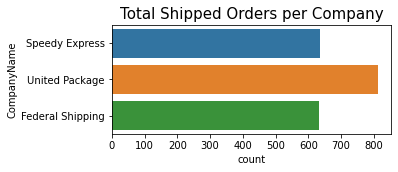

In [47]:
# Count penggunaan masing-masing shipping company

plt.figure(figsize=(5,2))
plt.title('Total Shipped Orders per Company', size = 15)
sns.countplot(y="CompanyName", data=df_shipped)
plt.show()

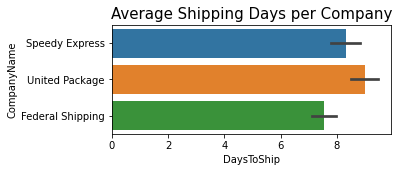

In [48]:
# Rata2 pengiriman masing-masing shipping company

plt.figure(figsize=(5,2))
plt.title('Average Shipping Days per Company', size = 15)
sns.barplot(x="DaysToShip", y="CompanyName", data=df_shipped, estimator=np.mean)
plt.show()

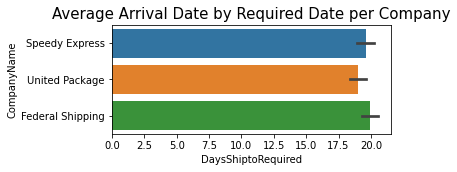

In [49]:
# Rata2 shipping date terhadap required date masing-masing shipping company

plt.figure(figsize=(5,2))
plt.title('Average Arrival Date by Required Date per Company', size = 15)
sns.barplot(x="DaysShiptoRequired", y="CompanyName", data=df_shipped, estimator=np.mean)
plt.show()

Terdapat 3 shipping company yang digunakan untuk pengiriman.

United Package digunakan untuk 39% orders. Rata-rata waktu pengiriman dihitung dari OrderDate adalah 8 hari dengan pengiriman paling cepat 1 hari dan paling lambat 37 hari. Sedangkan rata-rata selisih ShippedDate dengan RequiredDate adalah 19 hari. Kedatangan orders paling cepat adalah 39 hari sebelum required date. Namun, ada juga keterlambatan pengiriman hingga 23 hari.

Speedy Express digunakan untuk 30,55% orders. Rata-rata waktu pengiriman dihitung dari OrderDate adalah 8 hari dengan pengiriman paling cepat 1 hari dan paling lambat 37 hari. Sedangkan rata-rata selisih ShippedDate dengan RequiredDate adalah 19 hari. Kedatangan orders paling cepat adalah 39 hari sebelum required date. Namun, ada juga keterlambatan pengiriman hingga 18 hari. 

Federal Shipping digunakan untuk 30,45% orders. Rata-rata waktu pengiriman dihitung dari OrderDate adalah 7 hari dengan pengiriman paling cepat 1 hari dan paling lambat 35 hari. Sedangkan rata-rata selisih ShippedDate dengan RequiredDate adalah 19 hari. Kedatangan orders paling cepat adalah 41 hari sebelum required date. Namun, ada juga keterlambatan pengiriman hingga 18 hari. 

## **STATISTICS**

## **Statistics Questions**
1. Apakah terdapat korelasi antara tiap variable? Jika iya, variable mana saja yang memengaruhi satu sama lain?
2. Apakah quantity ordered memiliki perbedaan yang signifikan terhadap product category?

## **Korelasi Antara Tiap Variable**

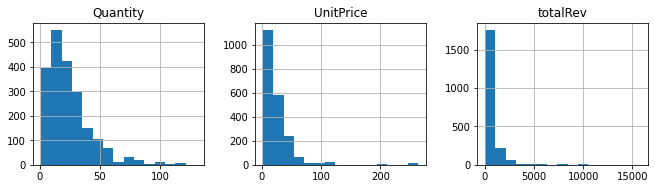

In [50]:
# Histogram data numeric

numerical = ['Quantity', 'UnitPrice', 'totalRev']
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

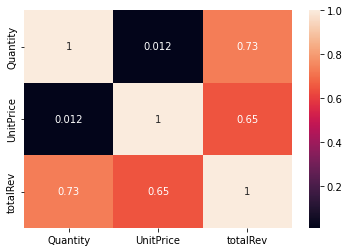

In [51]:
# Korelasi Spearman digunakan untuk data diskrit dan kontinu namun untuk statistik nonparametrik. 

sns.heatmap(df[numerical].corr('spearman'), annot=True)
plt.show()

In [52]:
# g = sns.PairGrid(df[numerical])
# g.map(sns.scatterplot)
# plt.show()

## **Pengaruh Product Category & Quantity Ordered**

Apakah quantity ordered memiliki perbedaan yang signifikan terhadap product category?

H0 : Tidak ada perbedan signifikan untuk quantity ordered pada setiap product category.

Ha : Ada perbedan signifikan untuk quantity ordered pada setiap product category.

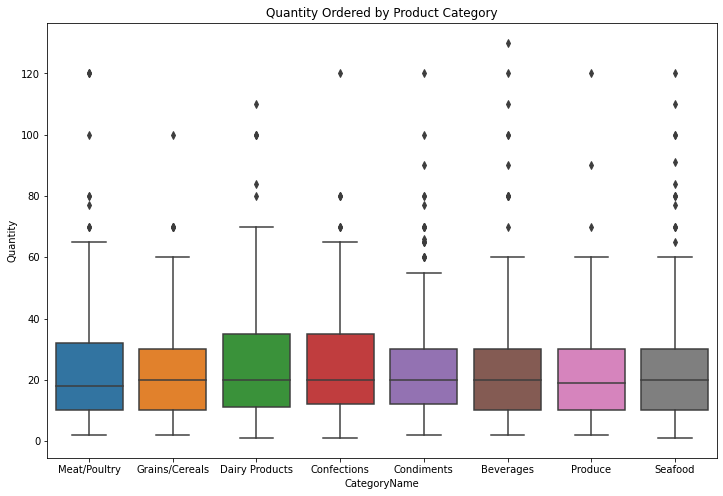

Quantity                                                    
                  count       mean        std  min   25%   50%   75%    max
CategoryName                                                               
Beverages         389.0  23.676093  19.129051  2.0  10.0  20.0  30.0  130.0
Condiments        207.0  25.289855  19.742592  2.0  12.0  20.0  30.0  120.0
Confections       324.0  23.895062  17.213145  1.0  12.0  20.0  35.0  120.0
Dairy Products    355.0  25.343662  18.902969  1.0  11.0  20.0  35.0  110.0
Grains/Cereals    191.0  23.026178  16.574055  2.0  10.0  20.0  30.0  100.0
Meat/Poultry      169.0  24.585799  22.384759  2.0  10.0  18.0  32.0  120.0
Produce           128.0  22.117188  18.338300  2.0  10.0  19.0  30.0  120.0
Seafood           319.0  23.670846  19.204333  1.0  10.0  20.0  30.0  120.0

In [53]:
# Boxplot dan Deskripsi Quantity by Category Product

plt.figure(figsize=(12,8))

sns.boxplot(x='CategoryName', y='Quantity', data=df)
plt.title('Quantity Ordered by Product Category')
plt.show()

df[['CategoryName', 'Quantity']].groupby(['CategoryName']).describe()

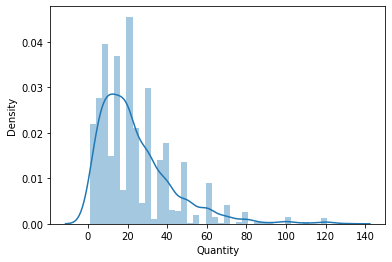

In [54]:
# Menampilkan plot Quantity

sns.distplot(df.Quantity)
plt.show()

Pengujian Normalitas Menggunakan Shapiro

H0 : Data Berdistribusi Normal

Ha : Data Tidak Berdistribusi Normal

In [55]:
from scipy.stats import shapiro

def checkDistribusi(values):
    norm, pval = shapiro(values)

    if pval < 0.05 :
        print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
        print ('DATA TIDAK BERDISTRIBUS NORMAL')
    else :
        print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
        print ('DATA BERDISTRIBUS NORMAL')

In [56]:
# Uji Normalitas Quantity per Category

print('Total Quantity per Category:')
checkDistribusi(df.Quantity)
print('\n')

categories = df.CategoryName.unique()
for cat in categories:
    print(cat)
    checkDistribusi(df[df.CategoryName==cat].Quantity)
    print('\n')

Total Quantity per Category:
Tolak H0 Karena P-Value (3.3119829334163484e-40 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


Meat/Poultry
Tolak H0 Karena P-Value (2.8980646143506386e-14 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


Grains/Cereals
Tolak H0 Karena P-Value (1.2179104946774544e-10 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


Dairy Products
Tolak H0 Karena P-Value (4.1031279699040805e-15 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


Confections
Tolak H0 Karena P-Value (4.458909844541441e-14 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


Condiments
Tolak H0 Karena P-Value (7.645801851884071e-14 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


Beverages
Tolak H0 Karena P-Value (5.737643322450604e-20 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


Produce
Tolak H0 Karena P-Value (6.648773892559134e-11 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


Seafood
Tolak H0 Karena P-Value (7.104795729102701e-18 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL




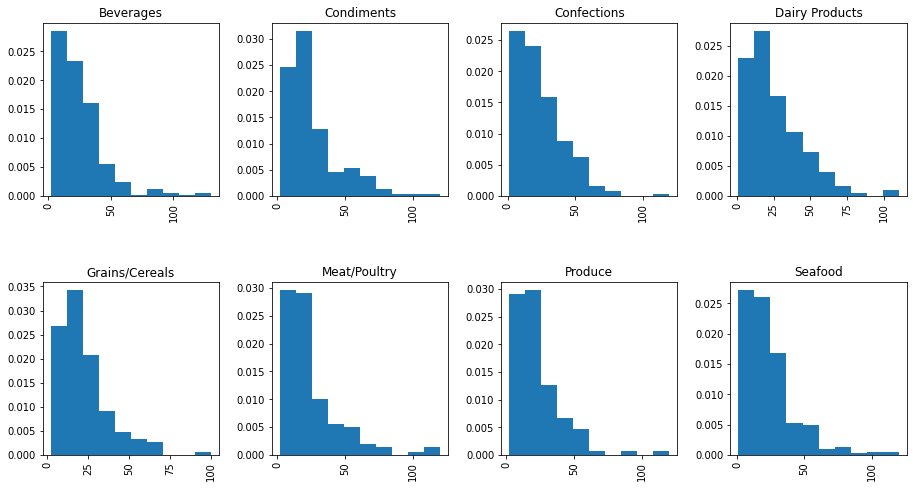

In [57]:
# Histogram Quantity by Category Name

df.hist(column='Quantity', by=['CategoryName'], figsize=[15,8], layout=(2, 4), density=True)
plt.show()

Berdasarkan pengujian normalitas shapiro dan histogram diatas, dapat ditarik kesimpulan bahwa data quantity ordered per product category tidak berdistribusi normal. Pengujian yang akan digunakan adalah Kruskal Wallis.

In [58]:
# Pengujian menggunakan Kruskal Wallis.

from scipy.stats import kruskal

krus, pVal = kruskal(
    df[df['CategoryName'] == 'Beverages']['Quantity'],
    df[df['CategoryName'] == 'Condiments']['Quantity'],
    df[df['CategoryName'] == 'Confections']['Quantity'],
    df[df['CategoryName'] == 'Dairy Products']['Quantity'],
    df[df['CategoryName'] == 'Grains/Cereals']['Quantity'],
    df[df['CategoryName'] == 'Meat/Poultry']['Quantity'],
    df[df['CategoryName'] == 'Produce']['Quantity'],
    df[df['CategoryName'] == 'Seafood']['Quantity']
)

if pVal < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pVal} < 5%)')
    print ('Ada Perbedan Signifikan untuk Quantity Ordered Pada Setiap Product Category.')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pVal} > 5%)')
    print ('Tidak Ada Perbedan Signifikan untuk Quantity Ordered Pada Setiap Product Category.')

Gagal Tolak H0 Karena P-Value (0.47498973880747675 > 5%)
Tidak Ada Perbedan Signifikan untuk Quantity Ordered Pada Setiap Product Category.
